### Import Necessary Packages and Load the data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('B:/data science projects/Engineering Colleges/lat-long/final')
data = pd.read_csv('Engineering_colleges.csv')

In [13]:
data_reviews = pd.read_csv('data_reviews.csv')

In [3]:
data.head()

,Institute_Name,Location,Sector,Review_Count,Fee,Exam,Rating,Latitude,Longitude,State
0,University of Petroleum and Energy Studies,Dehradun,Private,56,0,NaN,AAAA (Very Good),30.325565,78.043681,Uttarakhand
1,Manipal Institute of Technology,Manipal,Private,153,1540000,MET,AAAA (Very Good),13.351972,74.787031,Karnataka
2,SRM Institute of Science and Technology,Kattankulathur,Private,328,1000000,JEE Main,AAAA (Very Good),12.816150,80.036770,Tamil Nadu
3,Vellore Institute of Technology,Vellore,Private,350,780000,VITEEE,AAAA (Very Good),12.907175,79.130969,Tamil Nadu
4,Jain University,Ramanagara,Private,58,0,NaN,No Rating,12.725277,77.280480,Karnataka


In [14]:
data_reviews.head()

,institute_name,review,rating
0,A1 Global Institute of Engineering and Technol...,\nThe college is situated at a very good locat...,3.0
1,"AAA College of Engineering and Technology, Thi...",\nI would love to share my experience here. As...,5.0
2,"AAA College of Engineering and Technology, Thi...",\nteaching is well and good\nrelation between ...,5.0
3,"AAA College of Engineering and Technology, Thi...","\n* Placements are good for CS, ECE and IS\n* ...",5.0
4,"AAA College of Engineering and Technology, Thi...",\nNitte is a very good college located in Sout...,3.0


In [4]:
data.dtypes

Institute_Name     object
Location           object
Sector             object
Review_Count        int64
Fee                 int64
Exam               object
Rating             object
Latitude          float64
Longitude         float64
State              object
dtype: object

In [5]:
#Checking null values
data.isnull().sum()

Institute_Name       0
Location             0
Sector               0
Review_Count         0
Fee                  0
Exam              4204
Rating               0
Latitude             0
Longitude            0
State                0
dtype: int64

In [6]:
#Creating new category for null values in exam
data['Exam'] = data['Exam'].fillna('No Exam')

### Total Number of Institutes

In [7]:
data['Institute_Name'].count()

6976

### Which entrance exam has most reach to fetch entrance to colleges?

In [8]:
data.groupby('Exam')['Institute_Name'].count().sort_values(ascending = False)

Exam
No Exam                4204
 JEE Main              1320
 AP EAMCET              260
 TS EAMCET              165
 NATA                   160
 UPSEE                  150
 KEAM                   138
 COMEDK UGET            101
 GUJCET                  96
 KCET                    68
 MAHACET                 62
 GATE                    40
 JEE Advanced            23
 JEXPO                   22
 OJEE                    21
 BCECE                   19
 WBJEE                   19
 JEECUP                  13
 CG PET                  11
 CIPET JEE               10
 Uttarakhand JEEP         9
 IPU CET                  8
 VITEEE                   4
 JEECE                    4
 CUSAT CAT                4
 BITSAT                   3
 Assam CEE                3
 IMU CET                  3
 GCET                     3
 NIPER JEE                2
 JKCET                    2
 HPCET                    2
 GITAM GAT                2
 Uni-Gauge-E              2
 Amity JEE                2
 SRMJEEE       

### Number of institutes per each rating

In [9]:
data.groupby('Rating')['Institute_Name'].count().sort_values(ascending = False)

Rating
No Rating              6432
AAA+ (Good)             217
AAA (Above Average)     159
AAAA (Very Good)        124
AAAA+ (Outstanding)      38
AAAAA (Exceptional)       6
Name: Institute_Name, dtype: int64

### Institutes per Sector

In [10]:
data.groupby('Sector')['Institute_Name'].count().sort_values(ascending=False)

Sector
Private              5629
Public/Government    1341
No Sector               6
Name: Institute_Name, dtype: int64

### Top Institutes with high fee

In [11]:
data.groupby('Institute_Name')['Fee'].sum().sort_values(ascending=False)

Institute_Name
Indian Institute of Information Technology                        11777741
Amity University                                                   8268000
Bapuji Institute of Engineering and Technology                     4840000
College of Engineering                                             4278970
Government Polytechnic                                             3441281
Manipal Institute of Technology                                    3080000
Government Engineering College                                     3007158
Ansal University                                                   2780000
Sushant School of Art and Architecture                             2780000
Indian Maritime University                                         2700000
Amrita School of Engineering                                       2666000
School of Engineering                                              2360560
International Institute of Information Technology                  2331116
Institute 

-------------

### Let’s analyze the distribution of review counts. How does the distribution look like?

In [18]:
plt.hist(data['Review_Count'], color = 'green', edgecolor = 'black', bins = 10)
plt.title('Distribution of review counts')
plt.xlabel('Review Counts')
plt.show()   # Per institute how many reviews

TypeError: len() of unsized object

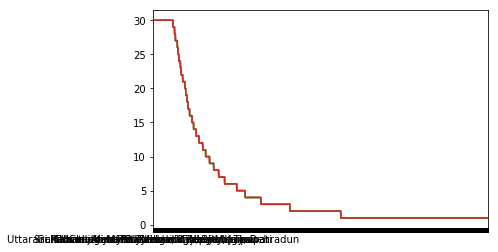

In [27]:
data_reviews['institute_name'].value_counts().plot()
plt.xticks(range(len(data_reviews['institute_name'].unique())))
plt.show()

##### Distribution is right skewed distribution, most of the institutes have reviews less than 90

---------------------------------------------------------

### Let’s analyze the distribution of college fees. How does the distribution look like?

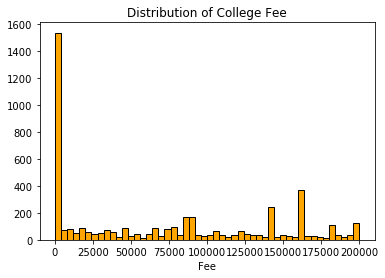

In [12]:
plt.hist(data['Fee'], color = 'orange', edgecolor = 'black', bins=50,range=[0,200000])
plt.title('Distribution of College Fee')
plt.xlabel('Fee')
plt.show()   #restrict the x axis 

##### Distribution is a Right skewed distribution, and most of the colleges have fee lees than 800000

------------------------------------

## Institutes with higher reviews have high fee. Test this hypothesis with appropriate visuals

##### Null Hypothesis Ho: Institute with high reviews have no significance difference with low reviews institutes
##### Alternative hypothesis H1: High Reviews institutes have significance difference with low reviews institutes

In [30]:
#institutes with review count greater than 80 considered as high reviews institutes and less than 80 considered as low reviews institutes
high = data[data['Review_Count']>80]
low = data[data['Review_Count']<=80]

In [42]:
ttest_ind(high['Fee'],low['Fee'])

Ttest_indResult(statistic=18.87482409321844, pvalue=1.535042162284124e-77)

#### P-value is less than 0.05, hence we can reject null hypothesis, i.e. there is a significance difference between low review and high review institutes. The statistic value is positive which shows high review institutes have high fee compared to low review institutes.

## Institutes with high rating have high fee compared to low rating

In [32]:
#Checking unique retings for all institutes
data['Rating'].unique()

array(['AAAA (Very Good)', 'No Rating', 'AAAAA (Exceptional)',
       'AAAA+ (Outstanding)', 'AAA+ (Good)', 'AAA (Above Average)'],
      dtype=object)

In [33]:
#Dividing the ratings into multiple samples
exceptional = data[data['Rating'] =='AAAAA (Exceptional)']
outstanding = data[data['Rating']=='AAAA+ (Outstanding)']
very_good = data[data['Rating']=='AAAA (Very Good)']
good = data[data['Rating'] =='AAA+ (Good)']
abv_avg = data[data['Rating'] =='AAA (Above Average)']
no_rating = data[data['Rating'] == 'No Rating']

##### We have multiple samples,so we have to use ANOVA i.e. Analysis of Variance
##### Null hypothesis Ho: All Ratings have no significance difference
##### Alternate hypothesis H1: All Ratings have a significance difference between them

In [34]:
import scipy.stats as stats
f_value, p_value = stats.f_oneway(exceptional['Fee'],outstanding['Fee'],very_good['Fee'],good['Fee'],abv_avg['Fee'],no_rating['Fee'])
print(f_value,p_value)

192.10902735028282 2.577578403114943e-192


##### P-value is less than 0.05, we can reject null hypothesis, but we didn't know which sample is higher compared to other, for that we can use pairwise_tukeyhsd to compare means of all samples

In [35]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [36]:
grp_comp = pairwise_tukeyhsd(data["Fee"], data["Rating"] )
print(grp_comp)

                  Multiple Comparison of Means - Tukey HSD,FWER=0.05                 
       group1              group2         meandiff      lower        upper     reject
-------------------------------------------------------------------------------------
AAA (Above Average)     AAA+ (Good)      68788.9748    7940.295   129637.6546   True 
AAA (Above Average)   AAAA (Very Good)  138186.7282   68352.3164  208021.1401   True 
AAA (Above Average) AAAA+ (Outstanding)  277309.353  172057.8227  382560.8834   True 
AAA (Above Average) AAAAA (Exceptional) 365713.5723  123301.9426  608125.2021   True 
AAA (Above Average)      No Rating      -188284.2831 -235078.2369 -141490.3292  True 
    AAA+ (Good)       AAAA (Very Good)   69397.7535   3779.8808   135015.6262   True 
    AAA+ (Good)     AAAA+ (Outstanding) 208520.3782  106017.9647  311022.7918   True 
    AAA+ (Good)     AAAAA (Exceptional) 296924.5975   55693.8815  538155.3136   True 
    AAA+ (Good)          No Rating      -257073.2579 -

##### by observing above table we can find which rating has higher fee compared to other rating

------------------------------------

### Private institutes have higher fees than the Govt. ones. Test this hypothesis. Try out multiple statistical tests for the same. Choose the level of significance (alpha = 0.05). <br> What happens when you try this out with a different alpha?


#### Null hypothesis Ho: Private institutes have no significance difference with Government institutes
#### Alternate hypothesis H1: Private institutes have significance difference with Government institutes

In [37]:
from scipy.stats import ttest_ind  

In [38]:
pvt = data[data['Sector'] =='Private']
gvt = data[data['Sector'] =='Public/Government']

ttest_ind(pvt['Fee'],gvt['Fee'])

Ttest_indResult(statistic=14.125141532544738, pvalue=1.0951265766002433e-44)

##### P-value is less than 0.05 we can reject null hypothesis. Means there is a significance differene between private and govt institutes and statistic value is 14.12 which is positie shows private institutes have higher fee than government institutes.

### Private institutes get better reviews than Govt. ones. Repeat the above exercise for this case now

-----------------------

### Identify which areas/locations are the education hubs of India? An area can be considered an education hub based if it has high density of good colleges

In [39]:
data.groupby('State')['Institute_Name'].count().sort_values(ascending=False)

State
Tamil Nadu                     1088
Maharashtra                     871
Uttar Pradesh                   599
Andhra Pradesh                  469
Karnataka                       462
Telangana                       425
Madhya Pradesh                  357
Kerala                          340
Gujarat                         293
Haryana                         293
Punjab                          286
Rajasthan                       283
Odisha                          229
West Bengal                     227
Bihar                           123
Uttarakhand                     123
Chhattisgarh                    104
Delhi                            74
Jharkhand                        71
Himachal Pradesh                 64
Assam                            50
Jammu and Kashmir                30
Puducherry                       25
Chandigarh                       15
Goa                              13
Tripura                          12
Meghalaya                        11
Arunachal Pradesh     

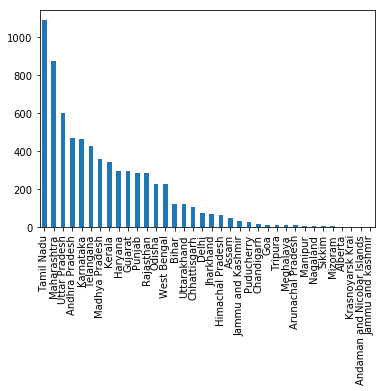

In [41]:
data['State'].value_counts().plot(kind='bar')
plt.show()

#### Tamilnadu has highest number of institutes followed by Maharashtra